## Comparing MNIST Images to see their closest corresponding images

One challenge with GANs and other geneative models is detecting whether the images you have created a just clones of what is already in the dataset. Here I have created a simple way to check a generated image to the closest images in the MNIST dataset. The way I am doing it is simply calculating the MSE between images.

One interesting thing that has come out of it is that there are quite a few images that are very similar between MNIST test set and the MNIST Train set

In [205]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

Basic MNIST import and flattening of images

In [206]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [207]:
X_train = X_train.reshape(len(X_train), -1).astype(np.float32)
X_test = X_test.reshape(len(X_test), -1).astype(np.float32)
X_train.shape

(60000, 784)

Basic plot for ploting MNIST images

In [208]:
def plot_image(pixels, label_string):
    pixels = np.array(pixels, dtype='uint8')
    print(pixels[0])
    pixels = pixels.reshape((28, 28))
    
    # Plot
    plt.title('MSE: {label}'.format(label= label_string))
    plt.imshow(pixels, cmap='gray')
    plt.show()

0


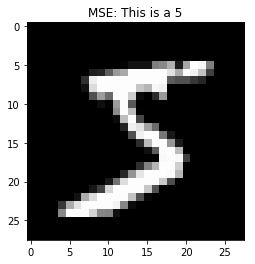

In [212]:
# Testing Plot
plot_image(X_train[0],'This is a 5')

## Calculating the MSE

with ax=0 the average is performed along the row, for each column, returning an array  
with ax=1 the average is performed along the column, for each row, returning an array  
with ax=None the average is performed element-wise along the array, returning a single value  

In [198]:
ax = None
A = X_train[1]
B = X_train[0] 
mse = ((A - B) ** 2).mean(axis=ax)
mse

7268.2422

## Function for getting the closet N images

image - flattened NP array of the image  
collection - the collection you want to compare against  
return_amount - the number of closest images returned  

In [189]:
def compare_image(image, collection,return_amount):
    lowest_image = 0
    lowest_mse = 1000000000
    ax = None
    arr = np.array([]).astype(np.float32)
    for i in range(len(collection)):
        mse = ((image - X_train[i]) ** 2).mean(axis=ax)
        arr = np.append(arr,mse)
        if mse< lowest_mse:
            lowest_mse = mse
            lowest_image = i
    print('The cloest match is {} with MSE of {} '.format(lowest_image,lowest_mse))
    ind = np.argpartition(arr,return_amount)[:return_amount]
    print(ind)
    return ind,arr

#### Running on image from the MNIST Test set and get 5 closest images from Train set (printing their MSE in title)

The cloest match is 53843 with MSE of 583.8851928710938 
[16186 38620 53843 27059 47003]
0


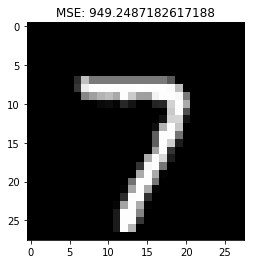

0


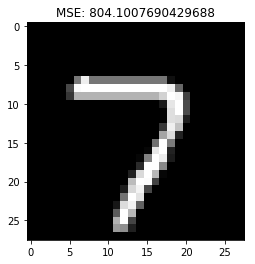

0


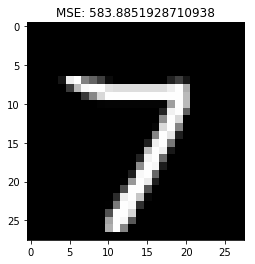

0


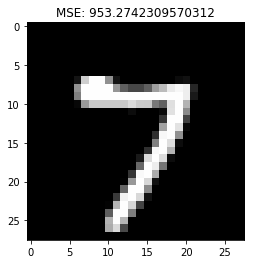

0


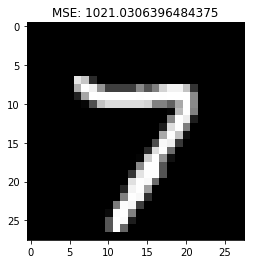

In [225]:
ind, mse = compare_image(X_test[0],X_train,5)

for i in range(len(ind)):
    plot_image(X_train[ind[i]],mse[ind[i]] )


### MSE plotted

0


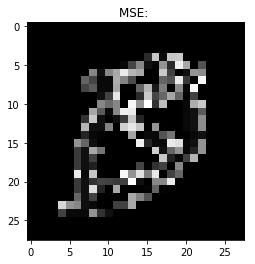

In [228]:
image = (X_train[0]-X_train[1])
image = image**2
plot_image(image,'')

The cloest match is 31030 with MSE of 359071648.0 
[31030]
0


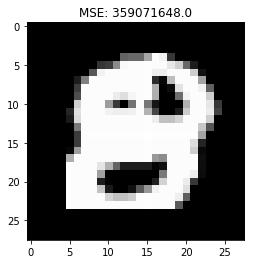

In [232]:
#comparing messed up image
ind,mse = compare_image(image,X_train,1)

for i in range(len(ind)):
    plot_image(X_train[ind[i]],mse[ind[i]] )